# Static correlation functions

We will consider classical systems composed of $N$ particles interacting via a pairwise potential $u(r)$. One first model is based on the Lennard-Jones potential
$$
u(r) = 4\epsilon \left[(\frac{\sigma}{r})^{12} - (\frac{\sigma}{r})^6\right]
$$
which provides a good description of the properties of nobel gases (Ar, Xe, Ne). In addition, we will cosnider the so-called Gaussian core model, in which particles interact via a Gaussian potential
$$
u(r) = \epsilon \exp{[- (r/\sigma)^2]}
$$
The Gaussian core model describes the effective interactions between dilute linear polymer chains in good solvent (note that \epsilon is considered here as a constant, i.e., it does not scale with $k_B T$).

We will analyze several "trajectories" obtained from molecular dynamics simulations performed in the microcanonical ensemble, at different density and total energy conditions. Energies and lengths are measured in units of $\epsilon$ and $\sigma$, respectively. The following values provide a good description of the properties of Argon using the Lennard-Jones potential: $\epsilon\approx 120 K$ and $\sigma \approx 3.4\times 10^{-10}m$.

Our goal is to characterize the thermodynamic and structural properties of the system using static correlation functions. Statistical averages will be carried out by averaging the quantities of interest over time. To this end, we will the [atooms](https://framagit.org/atooms/atooms/tree/master) python package and its companion [postprocessing](https://framagit.org/atooms/postprocessing/tree/master) package, which will help us analyzing the trajectories in a simple, pythonic way.

Should you need some more info about to the workings of `atooms` and `postprocessing`, which we will use for trajectory analysis, [this tutorial](https://coulomb.umontpellier.fr/perso/daniele.coslovich/atooms/) and [this other tutorial](https://coulomb.umontpellier.fr/perso/daniele.coslovich/pp_notebook/) might be useful.  

First off, we download a sample trajectory file (in so-called xyz format) and store it in the current directory.

In [2]:
from atooms.core.utils import download

download('https://framagit.org/atooms/atooms/raw/master/data/trajectory.xyz', '.')

Trajectories are list-like objects that can be iterated upon. Each frame of the trajectory contains a `System`, which is composed by a list of `Particle` objects and a simulation `Cell` (periodic boundary conditions were used in the used during the simulation). Type `help(system)` to get the full list of its properties.

In [3]:
from atooms.trajectory import Trajectory

# Open the trajectory and read the system at the last frame
with Trajectory('trajectory.xyz') as th:
    system = th[-1]

# Count how many particles we have and print the side of the simulation cell
print('N =', len(system.particle))
print('L =', system.cell.side)

# Print the density and kinetic temperature at the last frame
print('rho =', system.density)
print('T =', system.temperature)
print(system)

N = 1200
L = [10.0005999 10.0005999 10.0005999]
rho = 1.1997840619087705
T = 0.0
system composed of N=1200 particles
with chemical composition C={'A': 960, 'B': 240}
with chemical concentration x={'A': 0.8, 'B': 0.2}
enclosed in a cubic box at number density rho=1.199784



Let's use some `postprocessing` tools to compute static correlation functions (here the radial distribution function $g(r)$) and plot them

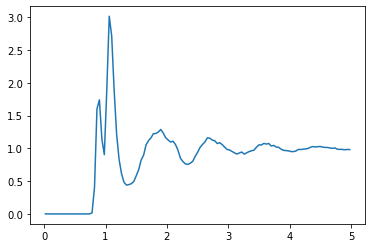

In [4]:
import atooms.postprocessing as pp
import matplotlib.pyplot as plt

gr = pp.RadialDistributionFunction('trajectory.xyz')
gr.compute()
plt.plot(gr.grid, gr.value)

Similarly, we can compute the static structure factor $S(k)$

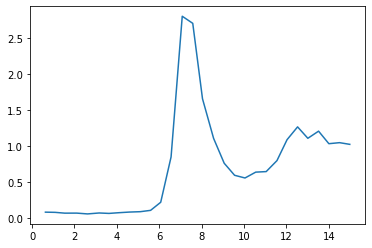

In [5]:
# Use the nk parameter to change the number of wave-vectors 
# to carry out the spherical average
# nk=200 should be fine
sk = pp.StructureFactor('trajectory.xyz', nk=200)
sk.compute()
plt.plot(sk.grid, sk.value)

**Exercise 1**: *trajectory analysis*

Download and analyze the following three trajectories for a single-component Lennard-Jones system:

- https://moodle2.units.it/pluginfile.php/404689/mod_folder/content/0/lj_1.xyz
- https://moodle2.units.it/pluginfile.php/404689/mod_folder/content/0/lj_2.xyz
- https://moodle2.units.it/pluginfile.php/404689/mod_folder/content/0/lj_3.xyz

For each of them, extract information about the thermodynamic state of the system and its local structure. 

As a reference, here is the phase diagram of the LJ system in the $\rho,T$ diagram (source: Johnson et al. Mol. Phys. 78, 591 (1993))

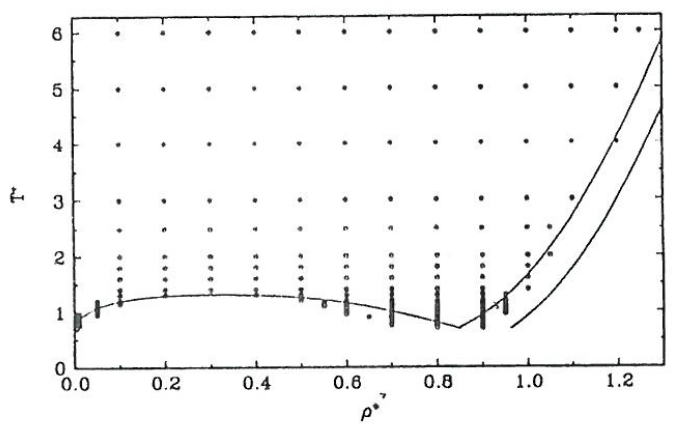

Here are a few questions to guide you in the analysis:
- How do the $g(r)$ and $S(k)$ look like?
- Can you guess which phase the system is in?
- How would you tell if the system is at equilibrium or not?

In [6]:
download('https://moodle2.units.it/pluginfile.php/404689/mod_folder/content/0/lj_1.xyz', '.')
download('https://moodle2.units.it/pluginfile.php/404689/mod_folder/content/0/lj_2.xyz', '.')
download('https://moodle2.units.it/pluginfile.php/404689/mod_folder/content/0/lj_3.xyz', '.')

from atooms.trajectory import Trajectory

print('\n*****************lj_1*****************\n')

# Open the trajectory and read the system at the last frame
with Trajectory('lj_1.xyz') as th:
    system = th[-1]

# Count how many particles we have and print the side of the simulation cell
print('N =', len(system.particle))
print('L =', system.cell.side)

# Print the density and kinetic temperature at the last frame
print('rho =', system.density)
print('T =', system.temperature)
print(system)

print('\n*****************lj_3*****************\n')

# Open the trajectory and read the system at the last frame
with Trajectory('lj_3.xyz') as th:
    system = th[-1]

# Count how many particles we have and print the side of the simulation cell
print('N =', len(system.particle))
print('L =', system.cell.side)

# Print the density and kinetic temperature at the last frame
print('rho =', system.density)
print('T =', system.temperature)
print(system)

print('\n****************lj_2******************\n')

# Open the trajectory and read the system at the last frame
with Trajectory('lj_2.xyz') as th:
    system = th[-1]

# Count how many particles we have and print the side of the simulation cell
print('N =', len(system.particle))
print('L =', system.cell.side)

# Print the density and kinetic temperature at the last frame
print('rho =', system.density)
print('T =', system.temperature)
print(system)


*****************lj_1*****************

N = 512
L = [8.44533754 8.44533754 8.44533754]
rho = 8.499999999999992e-01
T = 4.045883631262885
system composed of N=512 particles
with chemical composition C={'A': 512}
with chemical concentration x={'A': 1.0}
enclosed in a cubic box at number density rho=0.850000


*****************lj_3*****************

N = 864
L = [14.227573 14.227573 14.227573]
rho = 0.3000000137876101
T = 0.8812647617062963
system composed of N=864 particles
with chemical composition C={'A': 864}
with chemical concentration x={'A': 1.0}
enclosed in a cubic box at number density rho=0.300000


****************lj_2******************

N = 500
L = [8.44533754 8.44533754 8.44533754]
rho = 0.8300781249999992
T = 0.04740672748323313
system composed of N=500 particles
with chemical composition C={'A': 500}
with chemical concentration x={'A': 1.0}
enclosed in a cubic box at number density rho=0.830078



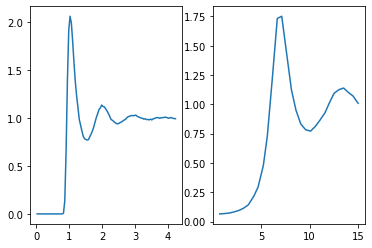

In [7]:
gr = pp.RadialDistributionFunction('lj_1.xyz')
gr.compute()

sk = pp.StructureFactor('lj_1.xyz', nk=200)
sk.compute()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(gr.grid, gr.value)
ax2.plot(sk.grid, sk.value)

lj_1 : Fase fluida

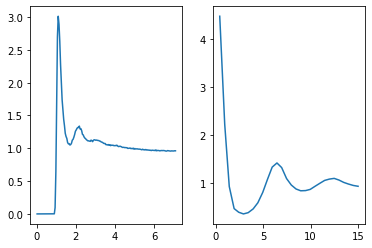

In [8]:
gr = pp.RadialDistributionFunction('lj_3.xyz')
gr.compute()

sk = pp.StructureFactor('lj_3.xyz', nk=200)
sk.compute()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(gr.grid, gr.value)
ax2.plot(sk.grid, sk.value)

lj_3 : Coesistenza liquido + gas

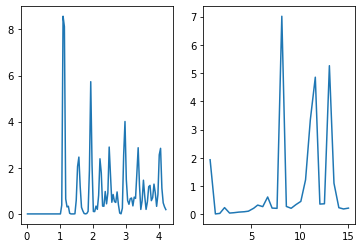

In [9]:
gr = pp.RadialDistributionFunction('lj_2.xyz')
gr.compute()

sk = pp.StructureFactor('lj_2.xyz', nk=200)
sk.compute()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(gr.grid, gr.value)
ax2.plot(sk.grid, sk.value)

lj_2 : Coesistenza solido + gas

**Exercise 2**: *local structure*
    
- Estimate the coordination number $N_1$, that is the number of nearest neighbors, of the Lennard-Jones liquid from the integral of the $g(r)$ over the first shell of neighbors (pick up the "right" trajectory from the ones above).
- Visualize the first coordination shell of a particle by adjusting the cutoff distance $r_c$ in the code below.

In [10]:
import numpy
from atooms.system import System

# Cutoff distance for the first shell of neighbors (to be adjusted!)
r_c = 1.6

# Gather neighbors in the first coordination shell
particle = system.particle[0]
shell = System()
shell.cell = system.cell
for other in system.particle:
    if other is not particle:
        r = numpy.sum(particle.distance(other, system.cell)**2)
        if r < r_c**2:
            neighbor = other.nearest_image(particle, system.cell, copy=True)
            shell.particle.append(neighbor)

# Now center the cluster at the origin for better visualization
for neighbor in shell.particle:
    neighbor.position -= particle.position

# Show the shell of neighbors
# Try the following to visualize the shell
shell.show('3dmol')
# if it does not work, we stick to the ugly matplotlib backend
#shell.show(show=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

**Exercise 3**: *static correlation length*

To see how far local density fluctuations are correlated in a liquid, estimate the microscopic correlation length $\xi_0$ from the decay of the long range oscillations of the total distribution function $h(r) = g(r) - 1$. To do this, plot $\log(|h(r)|)$ vs $r$ and "fit" the envelope of the peaks to the following functional form
$$
h(r) \sim \frac{\exp(-r/\xi_0)}{r}
$$

*Hint*: do not try to fit the envelope with `curve_fit()`, it is enough to adjust the parameter $\xi_0$ by hand!

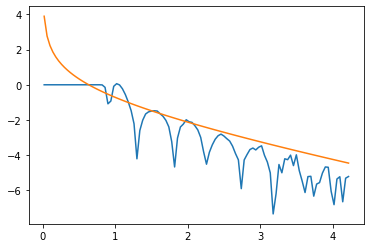

In [133]:
def yukawa(x, a):
    return numpy.exp(-x/a)/x

gr = pp.RadialDistributionFunction('lj_1.xyz')
gr.compute()
grid = gr.grid
gr = gr.value
hr = numpy.log(numpy.absolute(gr - 1))
plt.plot(grid, hr)
plt.plot(grid, numpy.log(numpy.absolute(yukawa(grid, 1.4))))
#plt.ylim([-1, 5])

**Exercise 4**: *Gaussian core model*

Download and analyze the following trajectories for the Gaussian core model

- https://moodle2.units.it/pluginfile.php/404690/mod_folder/content/0/gcm_rho0.1.xyz
- https://moodle2.units.it/pluginfile.php/404690/mod_folder/content/0/gcm_rho0.2.xyz
- https://moodle2.units.it/pluginfile.php/404690/mod_folder/content/0/gcm_rho0.4.xyz
- https://moodle2.units.it/pluginfile.php/404690/mod_folder/content/0/gcm_rho1.0.xyz
- https://moodle2.units.it/pluginfile.php/404690/mod_folder/content/0/gcm_rho2.0.xyz

The temperature is constant $T\approx 0.01$ (in reduced units) and the density is varied from $\rho=0.1 to 2.0$. Compute the and plot $g(r)$ as a function of density. Which peculiar features do you notice? How would you describe the bevahior of the $g(r)$ at high density? For reference, here is the phase diagram computed by Lang et al. J. Phys.: Condens. Matter 12, 5087 (2000) 

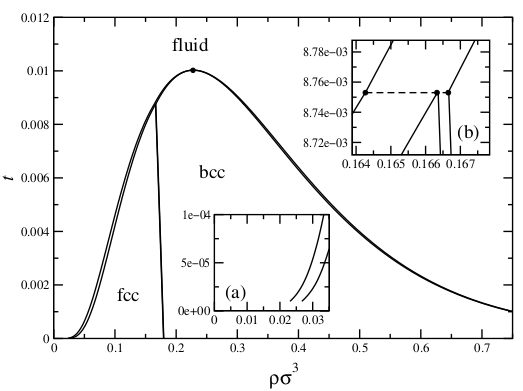

In [116]:
download('https://moodle2.units.it/pluginfile.php/404690/mod_folder/content/0/gcm_rho0.1.xyz', '.')
download('https://moodle2.units.it/pluginfile.php/404690/mod_folder/content/0/gcm_rho0.2.xyz', '.')
download('https://moodle2.units.it/pluginfile.php/404690/mod_folder/content/0/gcm_rho0.4.xyz', '.')
download('https://moodle2.units.it/pluginfile.php/404690/mod_folder/content/0/gcm_rho1.0.xyz', '.')
download('https://moodle2.units.it/pluginfile.php/404690/mod_folder/content/0/gcm_rho2.0.xyz', '.')




# Open the trajectory and read the system at the last frame
with Trajectory('gcm_rho0.1.xyz') as th:
    system = th[-1]

# Count how many particles we have and print the side of the simulation cell
print('N =', len(system.particle))
print('L =', system.cell.side)

# Print the density and kinetic temperature at the last frame
print('rho =', system.density)
print('T =', system.temperature)
print(system)

N = 512
L = [17.23547752 17.23547752 17.23547752]
rho = 0.10000000000000005
T = 0.0
system composed of N=512 particles
with chemical composition C={'1': 512}
with chemical concentration x={'1': 1.0}
enclosed in a cubic box at number density rho=0.100000



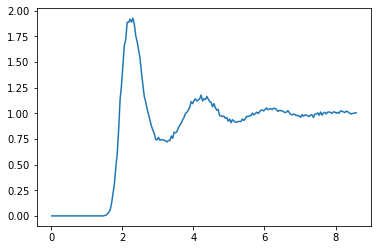

In [114]:
gr = pp.RadialDistributionFunction('gcm_rho0.1.xyz')
gr.compute()
plt.plot(gr.grid, gr.value)

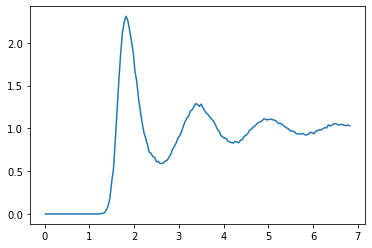

In [117]:
gr = pp.RadialDistributionFunction('gcm_rho0.2.xyz')
gr.compute()
plt.plot(gr.grid, gr.value)

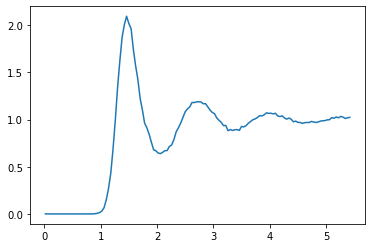

In [118]:
gr = pp.RadialDistributionFunction('gcm_rho0.4.xyz')
gr.compute()
plt.plot(gr.grid, gr.value)

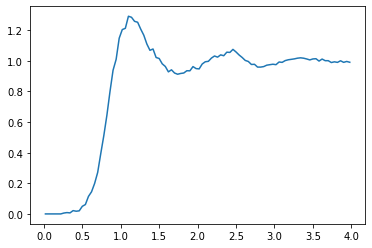

In [119]:
gr = pp.RadialDistributionFunction('gcm_rho1.0.xyz')
gr.compute()
plt.plot(gr.grid, gr.value)

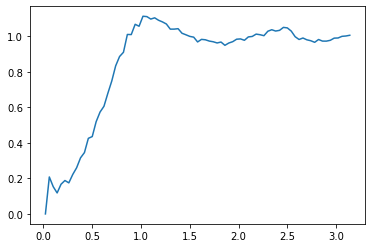

In [120]:
gr = pp.RadialDistributionFunction('gcm_rho2.0.xyz')
gr.compute()
plt.plot(gr.grid, gr.value)

Alla temperatura $T = 0.01$ il sistema rimane sempre in una fase fluida, senza cristallizzare, ma il tipo di fluido è diverso a seconda della densità: ad alte densità le posizioni delle particelle del fluido sono completamente scorrelate e si può approssimare $g(r) \sim 1$, analoga alla funzione di distribuzione di un gas perfetto. Questo potrebbe essere una conseguenza del fenomeno di re-entrant melting che si osserva in questo tipo di sistemi.